# Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt_tab')
import seaborn as sns

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/kandasamyahkkash/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
df  = pd.read_csv("../spam.csv",encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
#dropping un necessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [6]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [8]:
#cheking duplicated values
df.duplicated().sum()

np.int64(403)

In [9]:
df.shape

(5572, 2)

In [10]:
#dropping duplicates value
df.drop_duplicates(inplace=True)


In [11]:
df.shape

(5169, 2)

# Exploration

<Axes: xlabel='target'>

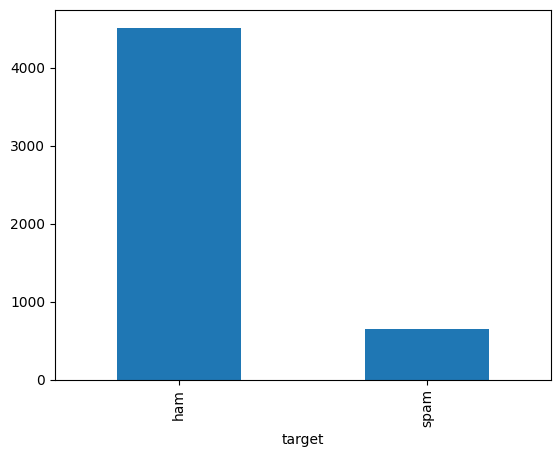

In [12]:
df['target'].value_counts().plot(kind='bar')

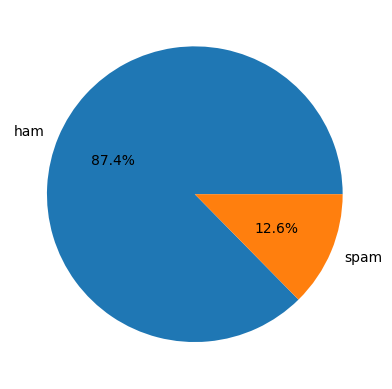

In [13]:
plt.pie(df["target"].value_counts(),labels=['ham','spam'],autopct='%1.1f%%')
plt.show()

In [14]:
#Adding new colunms : 
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [15]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [16]:
df[df['target'] == 'ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [17]:
df[df['target'] == 'spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In average, Spam messages likely have more characters, words and sentences. 

Now lets see the correlation but for that we have to transform our target column into 0 and 1

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [20]:
df.dtypes

target             int64
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object

In [21]:
df.corr(numeric_only=True)

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

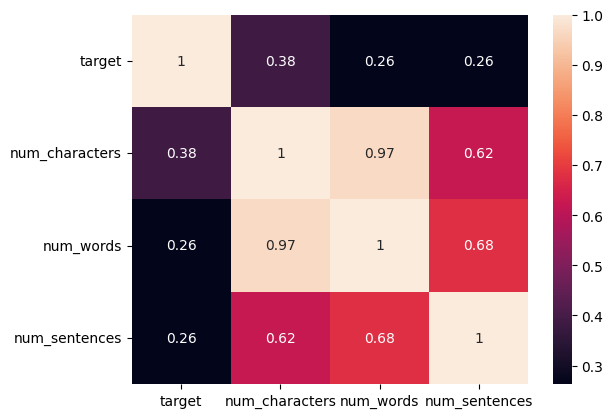

In [22]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

We can see that there is a correlation between target and num_characters and with previous observation we can say that generally when there is many characters it's likely be a spam.

Also before applying training our model with the dataset we have to do some cleaning so we can be more effective.

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Initialize stopwords and stemmer once (better performance)
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def transform_text(text):
    # Lowercase and tokenize the text
    words = nltk.word_tokenize(text.lower())
    
    # Filter out non-alphanumeric words and stopwords, and apply stemming
    words = [
        stemmer.stem(word) for word in words
        if word.isalnum() and word not in stop_words
    ]
    
    # Join the words back into a single string
    return " ".join(words)


stemming is good for spam detection

In [24]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Now we have a new column that which is clean and good for ours models

Let's see now which are often used in both cases

In [25]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10)

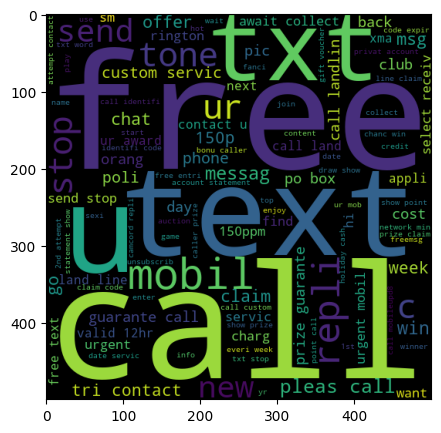

In [26]:
#generating Word cloud for only Spam words
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.imshow(spam_wc)
plt.show()

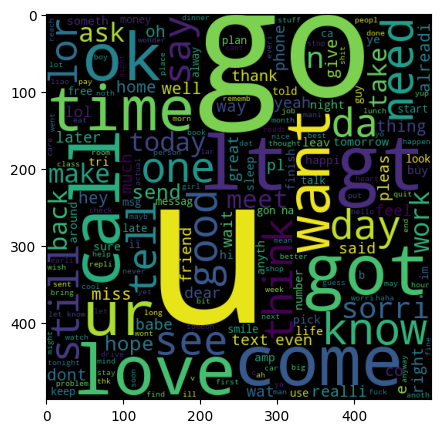

In [27]:
#generating Word cloud for only ham words

ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.imshow(ham_wc)
plt.show()

# Let's build our models

Before that we have to vectorize our texts

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [29]:
# Init vector TF-IDF
tfidf = TfidfVectorizer(max_features=3000)  # max_features limit 3000 words most frequent
# Transform  messages into  vectors TF-IDF
X = tfidf.fit_transform(df['text']).toarray()

# Target
y = df['target']

In [30]:
print("Shape of X:", X.shape)  
print("TF-IDF sample:", X[0])  


Shape of X: (5169, 3000)
TF-IDF sample: [0. 0. 0. ... 0. 0. 0.]


In [31]:
from sklearn.model_selection import train_test_split
# Séparer les données en training et test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Entraînement
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Prédictions
y_pred_nb = nb_model.predict(X_test)

# Évaluation
print("Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Performance:
Accuracy: 0.97678916827853
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       1.00      0.83      0.91       145

    accuracy                           0.98      1034
   macro avg       0.99      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [33]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Performance:
Accuracy: 0.9671179883945842
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.97      0.79      0.87       145

    accuracy                           0.97      1034
   macro avg       0.97      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [34]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.9777562862669246
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.99      0.85      0.91       145

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



Naive Bayes - Confusion Matrix


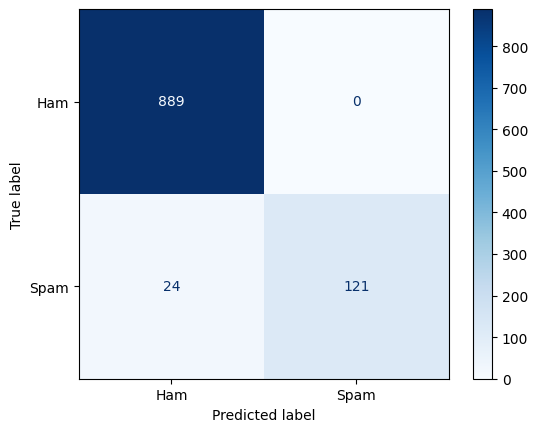

Logistic Regression - Confusion Matrix


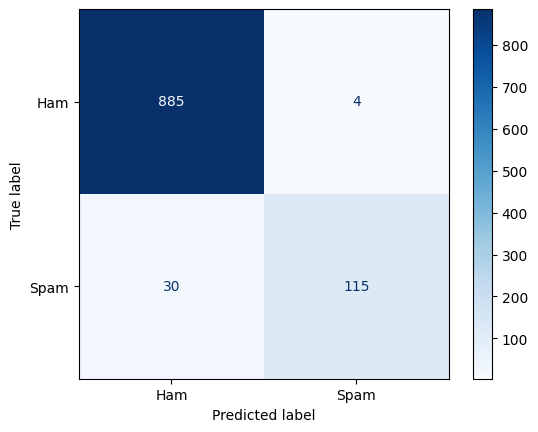

Random Forest - Confusion Matrix


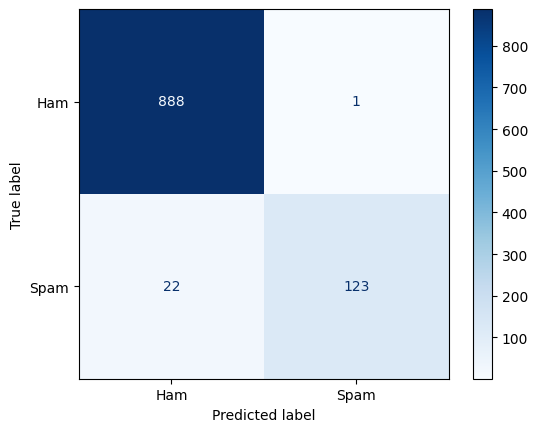

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {'Naive Bayes': y_pred_nb, 'Logistic Regression': y_pred_lr, 'Random Forest': y_pred_rf}
for model_name, predictions in models.items():
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
    print(f"{model_name} - Confusion Matrix")
    disp.plot(cmap="Blues")
    plt.show()


As we have an highly imbalanced dataset, looking at the accuracy to evaluate our models is not the most appropriate. In fact, we are focusing on the detection of the minority class which are the spam messages. Knowing that information, it will be better to judge the performance of our models using other letrics such as the F1 score. Looking at the f1 score of the logistic regression, we can see that it does not perform as well as the 2 other models. The random forest and the multinomial have similar F1 score? Looking at the precision and the recall, we can see that that the multinomial algorithm has a tiny better score but by looking at the recall score, the recall, the random forest performs better by a more noticeable difference. In conclusion, in my opinion, the random forest seems like the most appropriate solution. 

In [36]:
import mlflow
import mlflow.sklearn


# Activate MLflow and defind  tracking URI
mlflow.set_tracking_uri("https://dagshub.com/AhkkashK/ML-IN-PROD.mlflow")


In [37]:
from dotenv import load_dotenv

load_dotenv()

mlflow.set_experiment("classification_spam")

<Experiment: artifact_location='mlflow-artifacts:/a4b87bf858e84d8886cff24ab0e923e0', creation_time=1737761825031, experiment_id='1', last_update_time=1737761825031, lifecycle_stage='active', name='classification_spam', tags={}>

In [38]:
#  run MLflow
with mlflow.start_run(run_name="RandomForest_100_estimators"):
    # metrics
    accuracy = accuracy_score(y_test, y_pred_rf)
    class_report = classification_report(y_test, y_pred_rf, output_dict=True)

    # Logs params
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("random_state", 42)

    
    mlflow.log_metric("accuracy", accuracy)

    
    for label, metrics in class_report.items():
        if isinstance(metrics, dict): 
            for metric_name, metric_value in metrics.items():
                mlflow.log_metric(f"{label}_{metric_name}", metric_value)

   
    mlflow.sklearn.log_model(rf_model, "random_forest_model")
    mlflow.sklearn.log_model(tfidf, "tfidf_vectorizer")

print("Run finished with success and saved in MLFLOW")


2025/01/25 01:18:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/01/25 01:18:24 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/01/25 01:18:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_100_estimators at: https://dagshub.com/AhkkashK/ML-IN-PROD.mlflow/#/experiments/1/runs/8815fb7d7d9f4085bd7c79bd812fafc2
🧪 View experiment at: https://dagshub.com/AhkkashK/ML-IN-PROD.mlflow/#/experiments/1
Run finished with success and saved in MLFLOW
